In [63]:
#! usr/bin/env python3
import praw
import pandas as pd
from datetime import datetime as dt
import time, calendar
import psycopg2
import time
import pymongo
starttime=time.time()
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import scipy.stats as stats
from scipy.stats import linregress




In [10]:
# Write file to dataFrame
filepath = "df_reddit.csv"

dataframereddit = pd.read_csv(filepath, sep = '\t', encoding ='utf-8', parse_dates=['Created'])
dataframereddit


,Unnamed: 0,ID,Title,Body,Score,URL,Comments,Created
0,0,ejl023,Perfect timing,NaN,17413,https://v.redd.it/ayzsxc2tfm841,315,2020-01-04 04:14:06
1,1,ejk48x,TIL Research shows that children as young as 4...,NaN,23802,https://news.yale.edu/2018/07/23/even-4-year-o...,1116,2020-01-04 03:14:08
2,2,ejk3qx,In The Lego Movie (2014) Benny the spaceman ha...,NaN,18413,https://i.redd.it/1yf0ofvx4m841.jpg,264,2020-01-04 03:13:11
3,3,ejjmjr,Recommendations!,NaN,24502,https://i.redd.it/j6e4ge34zl841.jpg,101,2020-01-04 02:40:32
4,4,ejkcib,New Years photobomb!,NaN,11507,https://i.redd.it/1dashplv7m841.jpg,173,2020-01-04 03:29:40
...,...,...,...,...,...,...,...,...
6268834,7172467,el49up,"umm, oopsie!",NaN,344,https://i.redd.it/rldx31cqi9941.jpg,11,2020-01-07 09:51:27
6268835,7172468,elbkks,So do you want the green meth or the blue meth?,NaN,43,https://i.redd.it/2wuua1bfzc941.jpg,4,2020-01-07 21:30:22
6268836,7172469,elb5dc,Ah yes happened yesterday,NaN,45,https://i.redd.it/i82z1sx7sc941.jpg,1,2020-01-07 20:49:58
6268837,7172471,elbngo,Me Trying to sleep,NaN,40,https://i.redd.it/lflndbnq0d941.png,1,2020-01-07 21:37:44


In [64]:
# Cleaning work
work = dataframereddit.copy()
work.drop(['Body', 'URL', 'Unnamed: 0', 'Title'], axis=1, inplace = True)
work.dropna(axis=0, how='any', thresh=None, subset=['Score', 'Comments', 'Created'] , inplace=True)
work


,ID,Score,Comments,Created
0,ejl023,17413,315,2020-01-04 04:14:06
1,ejk48x,23802,1116,2020-01-04 03:14:08
2,ejk3qx,18413,264,2020-01-04 03:13:11
3,ejjmjr,24502,101,2020-01-04 02:40:32
4,ejkcib,11507,173,2020-01-04 03:29:40
...,...,...,...,...
6268834,el49up,344,11,2020-01-07 09:51:27
6268835,elbkks,43,4,2020-01-07 21:30:22
6268836,elb5dc,45,1,2020-01-07 20:49:58
6268837,elbngo,40,1,2020-01-07 21:37:44


In [275]:
# Important info

# Next step: do an analysis of the data to determine if there is a significant difference in 
# average score values in the beginning of the day, and the end of the day. then do the same for comments


# work.mean()
# Score avg = 2385.594459
# Comments avg = 68.359865
# Total hours = 109
# work.Score.max() = 151464
# work.Score.min() = 36
# comments min = 0
# comments max = 56981
# created max= 2020-01-07 21:41:52
# Created min = 2020-01-03 07:04:51
# work.Created.max()-work.Created.min() =  Timedelta('4 days 14:37:01')
# After checking for data errors, i have removed things after 
# data1.sort_values(by=['Created']).Created.min() - data1.sort_values(by=['Created']).Created.max() = Timedelta('-2 days +10:18:11')


data1.sort_values(by=['Created']).Created.max()

Timestamp('2020-01-07 21:41:52')

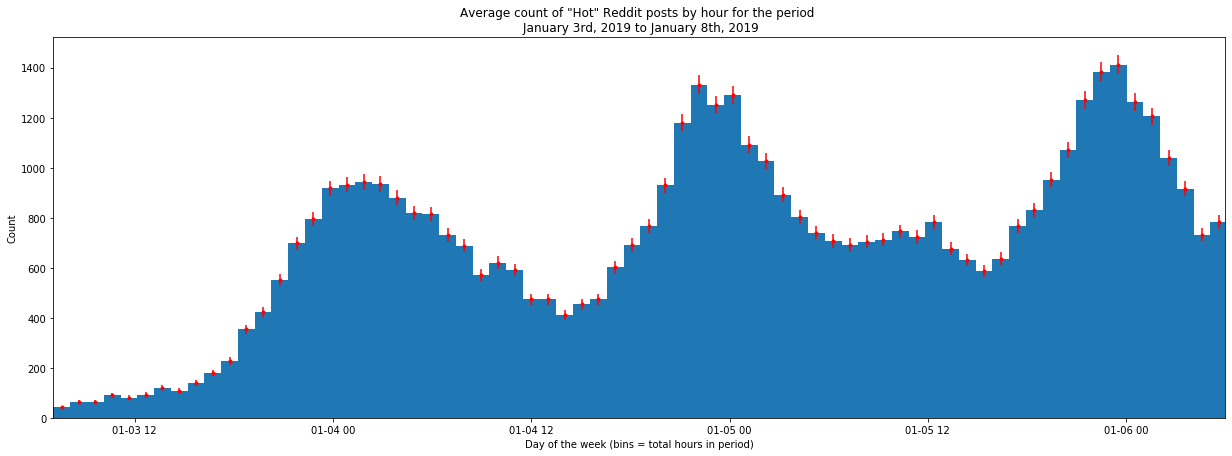

In [277]:
# Here we show a histogram by day of the score values
work.sort_values(by=['Score'], ascending = False, inplace = True)
data = work.Created
data1 = work.copy()
data1.set_index('Score', inplace = True)
data1.drop(['ID', 'Comments'], axis = 1, inplace = True)

fig, ax = plt.subplots(figsize=([21,7]))

entries1, edges1, _ = plt.hist(data1.Created, bins=109)

# # calculate bin centers
bin_centers = 0.5 * (edges1[:-1] + edges1[1:])

# # draw errorbars, use the sqrt error. You can use what you want there
# # poissonian 1 sigma intervals would make more sense
plt.errorbar(bin_centers, entries1, yerr=np.sqrt(entries1), fmt='r.')


ax.set_xlabel('Day of the week (bins = total hours in period)')
ax.set_ylabel('Count')

ax.set_title('Average count of "Hot" Reddit posts by hour for the period \n January 3rd, 2019 to January 8th, 2019')
# ax.set_xticks(ticks=list(range(0,121))) 
plt.xlim('2020-01-03 07:04:51', '2020-01-06 6:00:00')
plt.show()



In [244]:
data1.sort_values(by=['Created'])

,Created
Score,
12760,2020-01-03 07:04:51
15007,2020-01-03 07:07:39
16087,2020-01-03 07:07:58
42705,2020-01-03 07:08:45
8563,2020-01-03 07:09:06
...,...
39,2020-01-07 21:39:29
40,2020-01-07 21:39:39
46,2020-01-07 21:40:15


AttributeError: 'Line2D' object has no property 'type'

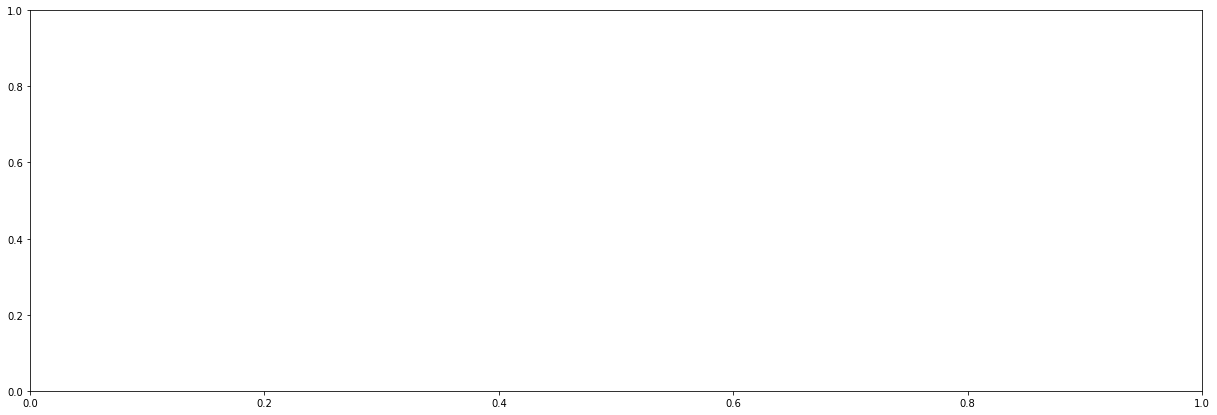

In [207]:
# Comments analysis
commentwork = work.copy()

commentwork = commentwork[commentwork['Comments'] > 68]
# x = work['Score']
commentwork['Created'] = pd.to_datetime(work['Created'], errors='coerce')


commentwork.drop(['ID', 'Score', 'Created'], axis=1, inplace = True)


# commentwork.groupby(work["Created"].dt.minute).count().plot( kind="bar", figsize = [20,10], 
#                                                             title = 'Count of Average Comments per Hour')
data1 = commentwork.groupby(work["Created"].dt.minute).count()
fig, ax = plt.subplots(figsize=([21,7]))

plt.plot(range(0,60),data1, type = 'hist')
data1

<BarContainer object of 77743 artists>

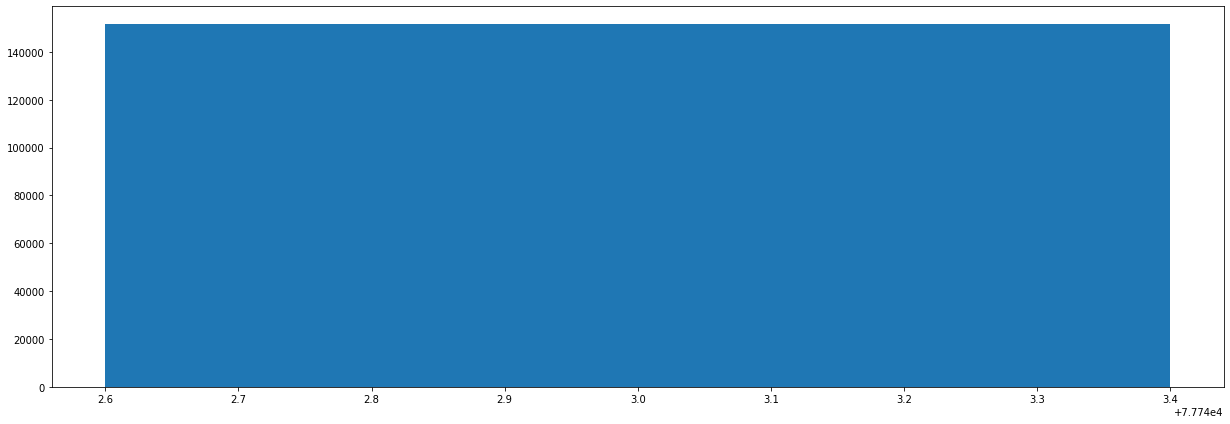

In [261]:
# Score Analysis
scorework = work.copy()

scorework = scorework[scorework['Score'] > 2385]
# x = work['Score']
scorework['Created'] = pd.to_datetime(work['Created'], errors='coerce')

scorework.drop(['ID', 'Comments', 'Created'], axis=1, inplace = True)
# work.drop[['']]
# scorework.groupby(work["Created"].dt.minute).count().plot( kind="bar", 
#                                                           figsize = [20,10], 
#                                                           title = 'Count of Average Score of Reddit posts for each minute in an hour')

fig, ax = plt.subplots(figsize=([21,7]))

plt.bar(work["Created"].dt.minute.count(), work.Score)
# plt.xlabel("Minute of hour (min)")



# plt.ylabel('Average score')

# scorework

In [186]:
study_df = work.copy()
study_df['68+ comments?'] = study_df['Comments'].apply(lambda x: 1 if x > 68 else 0)
# df['Normal'] = df.Speed.apply(lambda x: 1 if x == "Normal" else 0)

df_high_comments = study_df[study_df['Comments'] > 300] 
df_high_comments

,ID,Score,Comments,Created,68+ comments?
3111129,ek33p5,151464,1069,2020-01-05 05:50:50,1
4887766,ekehvg,146999,2463,2020-01-05 23:39:27,1
4797052,ekcm64,138583,3878,2020-01-05 20:48:52,1
2177414,ejwxed,133345,7105,2020-01-04 21:59:08,1
6266062,el1g2a,125388,1690,2020-01-07 06:23:25,1
...,...,...,...,...,...
2490116,ekc0yj,99,752,2020-01-05 19:44:43,1
4887924,ekrkol,97,2677,2020-01-06 17:04:16,1
805336,ejxydi,94,644,2020-01-04 23:30:25,1
3002887,ekgc53,93,366,2020-01-06 01:51:51,1


In [194]:
df_high_score = study_df[study_df['Score']>5000]
# Is there a significant relationship between high score and high amount of comments useless test
stats.ttest_ind(df_high_score.Score.sample(2741), df_high_comments.Comments)


Ttest_indResult(statistic=51.87214840434686, pvalue=0.0)

In [192]:
df_high_comments.Comments

3111129    1069
4887766    2463
4797052    3878
2177414    7105
6266062    1690
           ... 
2490116     752
4887924    2677
805336      644
3002887     366
2626099     355
Name: Comments, Length: 2741, dtype: int64

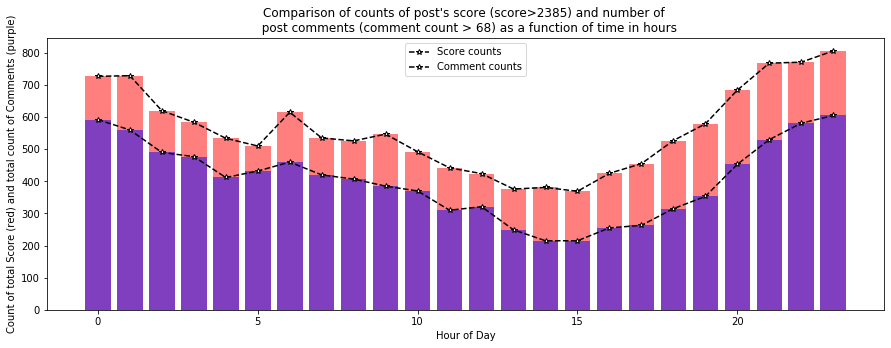

In [196]:
# df_high_score.groupby(df_high_score["Created"].dt.hour).count().plot( kind="bar")
# commentwork.groupby(work["Created"].dt.hour).count().plot( kind="bar", figsize = [20,10], stacked = True)
# scorework.groupby(work["Created"].dt.hour).count().plot( kind="bar", figsize = [20,10], stacked = True)


test_df = commentwork.groupby(work["Created"].dt.hour).count()
test_df['score']= scorework.groupby(work["Created"].dt.hour).count()
test_df['Created'] = list(range(0,24))
fig, ax = plt.subplots(figsize=([15,5]))
plt.plot(test_df.Created, test_df.score, color = 'black', alpha = 1, label = 'Score counts', linestyle='dashed', marker = '*', markerfacecolor='White')
plt.plot(test_df.Created, test_df.Comments,color = 'black',alpha = 1, label = 'Comment counts', linestyle='dashed', marker = '*', markerfacecolor = 'White')
rects1 = ax.bar(test_df.Created, test_df.score, color='r', alpha = .5)
rects2 = ax.bar(test_df.Created, test_df.Comments, color = 'b', alpha= .5)
# plt.figur(figsize=([40,10]))

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Count of total Score (red) and total count of Comments (purple)')
ax.legend()
ax.set_title("Comparison of counts of post's score (score>2385) and number of \n  post comments (comment count > 68) as a function of time in hours")
plt.show()


In [335]:
# Analysis of the score count and comment count by date time, dont use this.
stats.ttest_ind(scorework.groupby(work["Created"].dt.hour).count(), commentwork.groupby(work["Created"].dt.hour).count())

Ttest_indResult(statistic=array([11.4070408]), pvalue=array([5.25516666e-15]))

In [262]:
# Analysis chi square work
# DO MORE HERE JAMES, analyze this shit


Scorearray = scorework.groupby(work["Created"].dt.hour).count().Score.values
Commentarray = commentwork.groupby(work["Created"].dt.hour).count().Comments.values

# degrees of freedom = (#rows - 1)(#columns -1)
stats.chi2_contingency([Scorearray, Commentarray])

(83.67573851311334,
 7.98404737381813e-09,
 23,
 array([[770.99510806, 757.27110105, 656.30162091, 621.99160339,
         558.76314252, 546.99970794, 623.46203271, 567.09557535,
         544.54899241, 538.17713201, 502.39668516, 438.18793808,
         430.83579147, 354.86360981, 343.59031834, 328.39588201,
         392.11448598, 412.21035339, 485.2416764 , 533.76584404,
         653.85090537, 746.48795269, 795.99240654, 822.46013435],
        [802.00489194, 787.72889895, 682.69837909, 647.00839661,
         581.23685748, 569.00029206, 648.53796729, 589.90442465,
         566.45100759, 559.82286799, 522.60331484, 455.81206192,
         448.16420853, 369.13639019, 357.40968166, 341.60411799,
         407.88551402, 428.78964661, 504.7583236 , 555.23415596,
         680.14909463, 776.51204731, 828.00759346, 855.53986565]]))

In [321]:
work["Created"].dt.hour.count()
scorework.groupby(work["Created"].dt.hour)
# print(scorework.groupby(work["Created"].dt.hour).count())
# print(commentwork.groupby(work["Created"].dt.hour).count())


In [345]:
commentwork.groupby(work["Created"].dt.hour).count()

,Comments
Created,
0,592
1,560
2,490
3,477
4,412
5,432
6,460
7,420
8,407


In [394]:

# Levene test's for homogeneity of variance. based on this result, our distributions have homogeneity of variance. 
# LeveneResult(statistic=17.134951278114134, pvalue=0.0001468753110108723)

# Test to see if the distributions of comments and scores are distributed the same way and check for correlation. Based on these results, 

linregress(test_df.Comments, test_df.score)


LinregressResult(slope=2.6129130003640153, intercept=148.0054702699988, rvalue=0.9781518587229636, pvalue=1.6865157215254291e-16, stderr=0.11839800556581989)

In [396]:
stats.levene(test_df.Comments, test_df.score)

LeveneResult(statistic=17.134951278114134, pvalue=0.0001468753110108723)

In [160]:
commentwork.Comments.min()

101

In [256]:
# Next step: do an analysis of the data to determine if there is a significant difference in 
# average score values in the beginning of the day, and the end of the day. then do the same for comments


Timedelta('4 days 14:37:01')